In [21]:
import pytesseract
from pytesseract import Output
import PIL.Image
import cv2
from matplotlib import pyplot as plt


Page segmentation modes:<br><br>
0 Orientation and script detection (OSD) only. <br>
1 Automatic page segmentation with OSD. <br>
2 Automatic page segmentation, but no OSD, or OCR. <br>
3 Fully automatic page segmentation, but no OSD. (Default) <br>
4 Assume a single column of text of variable sizes. <br>
5 Assume a single uniform block of vertically aligned text. <br>
6 Assume a single uniform block of text. <br>
7 Treat the image as a single text line. <br>
8 Treat the image as a single word <br>
9 Treat the image as a single word in a circle. <br>
10 Treat the image as a single character. <br>
11 Sparse text. Find as much text as possible in no particular order. <br>
12 Sparse text with OSD. <br>
13 Raw line. Treat the image as a single text line <br>
    bypassing hacks that are tessearact-specific <br>

<br> <br>
OCR Engine Mode : <br>
0   Leagcy Engine only <br>
1   Nueral nets LSTM engi9ne only. <br>
2   Legacy + LSTM engines. <br>
3   Default, based on what is available <br>

In [4]:
myconfig = r"--psm 6 --oem 3"

In [6]:
# #test
# text = pytesseract.image_to_string(PIL.Image.open('text.png'), config=myconfig)
# print(text)

On his way out, a station wagon pulled in. There was a
roofrack on top, and the wagon was piled high with kids and
luggage. The wagon had New York plates and the driver,
who rolled down his window to ask Harry how to get to US
21 going north, had a New York accent. Harry gave the New
York fellow very clear directions on how to get to Highway
21. He also served him and his entire family their death-
warrants without even knowing it.



In [10]:
img = cv2.imread("text.png")
height, width, _ = img.shape



In [11]:
# boxes = pytesseract.image_to_boxes(img, config=myconfig)
# for box in boxes.splitlines():
#     box = box.split(" ")
#     img = cv2.rectangle(img, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 0), 2)

# cv2.imshow("img", img)
# cv2.waitKey(0)

In [15]:
data = pytesseract.image_to_data(img, config=myconfig, output_type=Output.DICT)

print(data)
print(data.keys())

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
boxes = len(data['text'])
for i in range(boxes):
    if float(data['conf'][i]) > 75:
        (x, y, width, height) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img = cv2.rectangle(img, (x,y), (x+width, y+height), (0,255,0), 2)

cv2.imshow("img", img)
cv2.waitKey(0)

-1

(-0.5, 735.5, 236.5, -0.5)

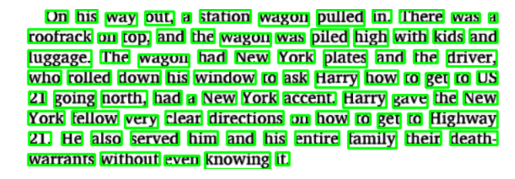

In [24]:
result = cv2.imread("word-boxes.png")
plt.imshow(result)
plt.axis('off')